# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [2]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from datafromsource import DataFromSource

In [2]:
import lseg.data as ld
import pandas as pd
import numpy as np
# import cufflinks as cf  # Cufflinks
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
import math
from datetime import datetime, timedelta
import pandas_datareader.data as web

In [4]:
portfolio = ["GOLD.N", 
             "TSLA.O", 
             "GOOGL.O", 
             'MSFT.O',
             'PPG.N',
             'CX.N',
             'GM.N']

In [8]:
portfolio = ["TSLA.O", 
             "GOOGL.O", 
             'MSFT.O',
             'PPG.N',
             'CX.N',
             'GM.N']

In [13]:
appl = DataFromSource('AAPL.O', interval_period='1W', initial = round(365.2*10))
df = appl.get_daily_returns()
df

AAPL.O,AAPL.O
Date,
2015-09-04,NaN
2015-09-11,0.044217
2015-09-18,-0.006677
2015-09-25,0.011045
2015-10-02,-0.038478
...,...
2025-07-25,0.012704
2025-08-01,-0.055268
2025-08-08,0.125102


In [9]:
instrumento = DataFromSource(portfolio[0], interval_period='1W', initial = round(365.2*10))
weekly_returns = instrumento.get_daily_returns()
weekly_returns

TSLA.O,TSLA.O
Date,
2015-09-04,NaN
2015-09-11,0.033772
2015-09-18,0.040643
2015-09-25,-0.014338
2015-10-02,-0.037032
...,...
2025-07-25,-0.042099
2025-08-01,-0.043421
2025-08-08,0.085521


In [10]:
import datetime as dt
delta_day = weekly_returns.index[0]
today = dt.date.today()

In [11]:
df_ts_rndm = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")

Precios = df_ts_rndm.rename(columns={'Price Close': portfolio[0]})
Precios

TSLA.O,TSLA.O
Date,
2015-09-04,16.128651
2015-09-11,16.68265
2015-09-18,17.374649
2015-09-25,17.127316
2015-10-02,16.50465
...,...
2025-07-25,316.06
2025-08-01,302.63
2025-08-08,329.65


In [15]:
df_ts_rndm = DataFromSource('AAPL.O')
df = appl.get_prices()
df

AAPL.O,close
Date,
2015-09-04,27.3175
2015-09-11,28.5525
2015-09-18,28.3625
2015-09-25,28.6775
2015-10-02,27.5950
...,...
2025-07-25,213.8800
2025-08-01,202.3800
2025-08-08,229.3500


In [16]:
for i in portfolio[1:]:
    print(i)
    w = ld.get_history([i], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    w1 = w.rename(columns={'Price Close': i})
    Precios = Precios.join(w1, lsuffix="_left", rsuffix="_right")

GOOGL.O
MSFT.O
PPG.N
CX.N
GM.N


In [17]:
Precios

,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
Date,,,,,,
2015-09-04,16.128651,31.448,42.61,93.31,6.795482,28.88
2015-09-11,16.68265,32.765,43.48,96.72,7.146813,30.15
2015-09-18,17.374649,33.046,43.48,93.19,7.119076,30.51
2015-09-25,17.127316,32.0075,43.94,88.34,6.444151,29.41
2015-10-02,16.50465,32.8495,45.57,92.66,6.592079,31.73
...,...,...,...,...,...,...
2025-07-25,316.06,193.18,513.71,115.95,8.41,53.4
2025-08-01,302.63,189.13,524.11,104.44,8.4,52.53
2025-08-08,329.65,201.42,522.04,106.95,8.62,53.53


In [18]:
Precios = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
Precios.shift(1)

TSLA.O,Price Close
Date,
2015-09-04,<NA>
2015-09-11,16.128651
2015-09-18,16.68265
2015-09-25,17.374649
2015-10-02,17.127316
...,...
2025-07-25,329.65
2025-08-01,316.06
2025-08-08,302.63


In [19]:
Precios = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")


Precios['Close'] = Precios['Price Close'].astype(float)
Precios[portfolio[0]] = np.log(Precios['Close'].div(Precios['Close'].shift(1)))
weekly_returns = Precios.drop(['Price Close', 'Close'], axis=1)
weekly_returns 


TSLA.O,TSLA.O
Date,
2015-09-04,NaN
2015-09-11,0.033772
2015-09-18,0.040643
2015-09-25,-0.014338
2015-10-02,-0.037032
...,...
2025-07-25,-0.042099
2025-08-01,-0.043421
2025-08-08,0.085521


In [20]:
for instrument in range(1,len(portfolio)):
    print(instrument, portfolio[instrument])
    Precios = ld.get_history([portfolio[instrument]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    Precios['Close'] = Precios['Price Close'].astype(float)
    Precios[portfolio[instrument]] = np.log(Precios['Close'].div(Precios['Close'].shift(1)))
    Precios = Precios.drop(['Price Close', 'Close'], axis=1)
    weekly_returns = weekly_returns.join(Precios)

1 GOOGL.O
2 MSFT.O
3 PPG.N
4 CX.N
5 GM.N


In [21]:
weekly_returns

,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
Date,,,,,,
2015-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-11,0.033772,0.041025,0.020212,0.035893,0.050409,0.043036
2015-09-18,0.040643,0.008540,0.000000,-0.037180,-0.003889,0.011870
2015-09-25,-0.014338,-0.031930,0.010524,-0.053447,-0.099605,-0.036720
2015-10-02,-0.037032,0.025966,0.036425,0.047744,0.022696,0.075928
...,...,...,...,...,...,...
2025-07-25,-0.042099,0.042942,0.007150,0.012322,0.098645,0.003376
2025-08-01,-0.043421,-0.021188,0.020043,-0.104546,-0.001190,-0.016426
2025-08-08,0.085521,0.062958,-0.003957,0.023749,0.025853,0.018858


In [22]:
# Se identifican activos que no tengan la historia de rendimientos completa
s = weekly_returns.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in weekly_returns: 
   if s[col] >= 2:  
       del weekly_returns[col]

In [23]:
weekly_returns = weekly_returns.dropna()
weekly_returns

,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
Date,,,,,,
2015-09-11,0.033772,0.041025,0.020212,0.035893,0.050409,0.043036
2015-09-18,0.040643,0.008540,0.000000,-0.037180,-0.003889,0.011870
2015-09-25,-0.014338,-0.031930,0.010524,-0.053447,-0.099605,-0.036720
2015-10-02,-0.037032,0.025966,0.036425,0.047744,0.022696,0.075928
2015-10-09,-0.114934,0.021458,0.033236,0.035099,0.098747,0.037729
...,...,...,...,...,...,...
2025-07-25,-0.042099,0.042942,0.007150,0.012322,0.098645,0.003376
2025-08-01,-0.043421,-0.021188,0.020043,-0.104546,-0.001190,-0.016426
2025-08-08,0.085521,0.062958,-0.003957,0.023749,0.025853,0.018858


In [24]:
weekly_returns.shape


(520, 6)

# Set Parameters

In [25]:
weekly_returns.columns

Index(['TSLA.O', 'GOOGL.O', 'MSFT.O', 'PPG.N', 'CX.N', 'GM.N'], dtype='object')

In [26]:
.4'GOLD.N', .2'TSLA.O', .1'GOOGL.O', .05'MSFT.O', .05'PPG.N', .02'CX.N', .18'GM.N'

SyntaxError: invalid syntax (2301147150.py, line 1)

In [27]:
stocks = weekly_returns.columns


In [28]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(6, 520)

In [29]:
NUM_PF = 100000 # no of portfolios to simulate


In [30]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([0.12351441, 0.13543237, 0.13218786, 0.29096269, 0.14389715,
       0.17400552])

# Annualization Factor


In [31]:
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

47

# Compute Mean Returns, Covariance and Precision Matrix


In [32]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
cov_matrix

,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
TSLA.O,0.006557,0.001157,0.001061,0.000918,0.001286,0.001680
GOOGL.O,0.001157,0.001391,0.000807,0.000541,0.000761,0.000706
MSFT.O,0.001061,0.000807,0.001020,0.000513,0.000564,0.000584
PPG.N,0.000918,0.000541,0.000513,0.001321,0.001206,0.001125
CX.N,0.001286,0.000761,0.000564,0.001206,0.004014,0.001635
GM.N,0.001680,0.000706,0.000584,0.001125,0.001635,0.002651


In [33]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
precision_matrix

,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
TSLA.O,204.181492,-57.036833,-117.486740,5.895646,-3.767145,-88.554954
GOOGL.O,-57.036833,1412.902599,-957.624006,-42.874542,-75.889474,-64.385954
MSFT.O,-117.486740,-957.624006,2007.726130,-350.911455,36.716656,13.836982
PPG.N,5.895646,-42.874542,-350.911455,1437.740272,-216.712870,-391.565400
CX.N,-3.767145,-75.889474,36.716656,-216.712870,375.652450,-125.252445
GM.N,-88.554954,-64.385954,13.836982,-391.565400,-125.252445,690.972192


# Risk-Free Rate

In [34]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', delta_day, today)
                         .resample('ME')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [35]:
treasury_10yr_monthly

DATE
2015-09-30    0.000438
2015-10-31    0.000460
2015-11-30    0.000470
2015-12-31    0.000483
2016-01-31    0.000413
                ...   
2025-04-30    0.000887
2025-05-31    0.000938
2025-06-30    0.000902
2025-07-31    0.000930
2025-08-31    0.000902
Freq: ME, Name: DGS10, Length: 120, dtype: float64

In [36]:
rf_rate = 0.000898


# Simualate Random Portfolios

In [37]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [39]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)
simul_perf, simul_wt

(       Annualized Standard Deviation  Annualized Returns  Sharpe Ratio
 0                           0.342801            0.069107      0.198975
 1                           0.290873            0.049052      0.165549
 2                           0.218899            0.250068      1.138287
 3                           0.352332            0.066729      0.186842
 4                           0.255495            0.184590      0.718964
 ...                              ...                 ...           ...
 99995                       0.298068            0.092128      0.306070
 99996                       0.218938            0.250147      1.138445
 99997                       0.310531            0.054839      0.173706
 99998                       0.434313            0.024705      0.054815
 99999                       0.240638            0.028468      0.114572
 
 [100000 rows x 3 columns],
 array([[6.04090235e-17, 3.12617973e-02, 2.43240449e-03, 8.29108597e-10,
         1.12667090e-02, 9.550390

In [40]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)
simul_perf, simul_wt

(       Annualized Standard Deviation  Annualized Returns  Sharpe Ratio
 0                           0.352959            0.065620      0.183369
 1                           0.213749            0.199245      0.927942
 2                           0.334689            0.106450      0.315375
 3                           0.252000            0.062357      0.243887
 4                           0.260989            0.023209      0.085485
 ...                              ...                 ...           ...
 99995                       0.328894            0.080969      0.243454
 99996                       0.247844            0.194093      0.779501
 99997                       0.348761            0.069248      0.195981
 99998                       0.227103            0.146422      0.640787
 99999                       0.317909            0.056845      0.175984
 
 [100000 rows x 3 columns],
 array([[9.08640742e-25, 7.35762111e-21, 1.30856994e-18, 4.05145565e-14,
         1.14580592e-12, 1.000000

In [41]:
simul_perf

,Annualized Standard Deviation,Annualized Returns,Sharpe Ratio
0,0.352959,0.065620,0.183369
1,0.213749,0.199245,0.927942
2,0.334689,0.106450,0.315375
3,0.252000,0.062357,0.243887
4,0.260989,0.023209,0.085485
...,...,...,...
99995,0.328894,0.080969,0.243454
99996,0.247844,0.194093,0.779501
99997,0.348761,0.069248,0.195981
99998,0.227103,0.146422,0.640787


In [42]:
simul_wt

array([[9.08640742e-25, 7.35762111e-21, 1.30856994e-18, 4.05145565e-14,
        1.14580592e-12, 1.00000000e+00],
       [2.39516430e-03, 4.83850661e-01, 4.14876625e-01, 1.02763908e-05,
        2.60709898e-21, 9.88672738e-02],
       [1.81135524e-01, 1.05141804e-04, 7.53165328e-03, 2.86644450e-14,
        4.94504626e-02, 7.61777218e-01],
       ...,
       [1.04297503e-02, 1.12349361e-02, 1.91823754e-10, 1.21605730e-05,
        2.43777289e-32, 9.78323153e-01],
       [2.17507983e-06, 7.81582627e-01, 1.70749411e-14, 2.17604114e-01,
        2.79023430e-11, 8.11084679e-04],
       [1.00277161e-07, 6.55427919e-12, 8.07388970e-12, 1.82821210e-01,
        4.81251783e-16, 8.17178690e-01]], shape=(100000, 6))

In [43]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.665071e-01,1.668017e-01,1.665448e-01,1.681043e-01,1.651442e-01,1.668979e-01
std,3.265775e-01,3.278105e-01,3.265842e-01,3.278275e-01,3.250478e-01,3.272257e-01
min,4.716639e-101,4.338946e-92,1.836144e-105,6.034879e-111,8.000032e-121,6.992704e-118
25%,2.720056e-11,2.215933e-11,2.807665e-11,2.535522e-11,2.156574e-11,2.318634e-11
50%,2.655375e-05,2.457003e-05,2.434120e-05,2.748559e-05,2.466477e-05,2.596843e-05
75%,8.069033e-02,7.799115e-02,8.317170e-02,8.596267e-02,7.960514e-02,7.978115e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Plot Simulated Portfolios

Max Sharpe: 22.03%, 25.29%


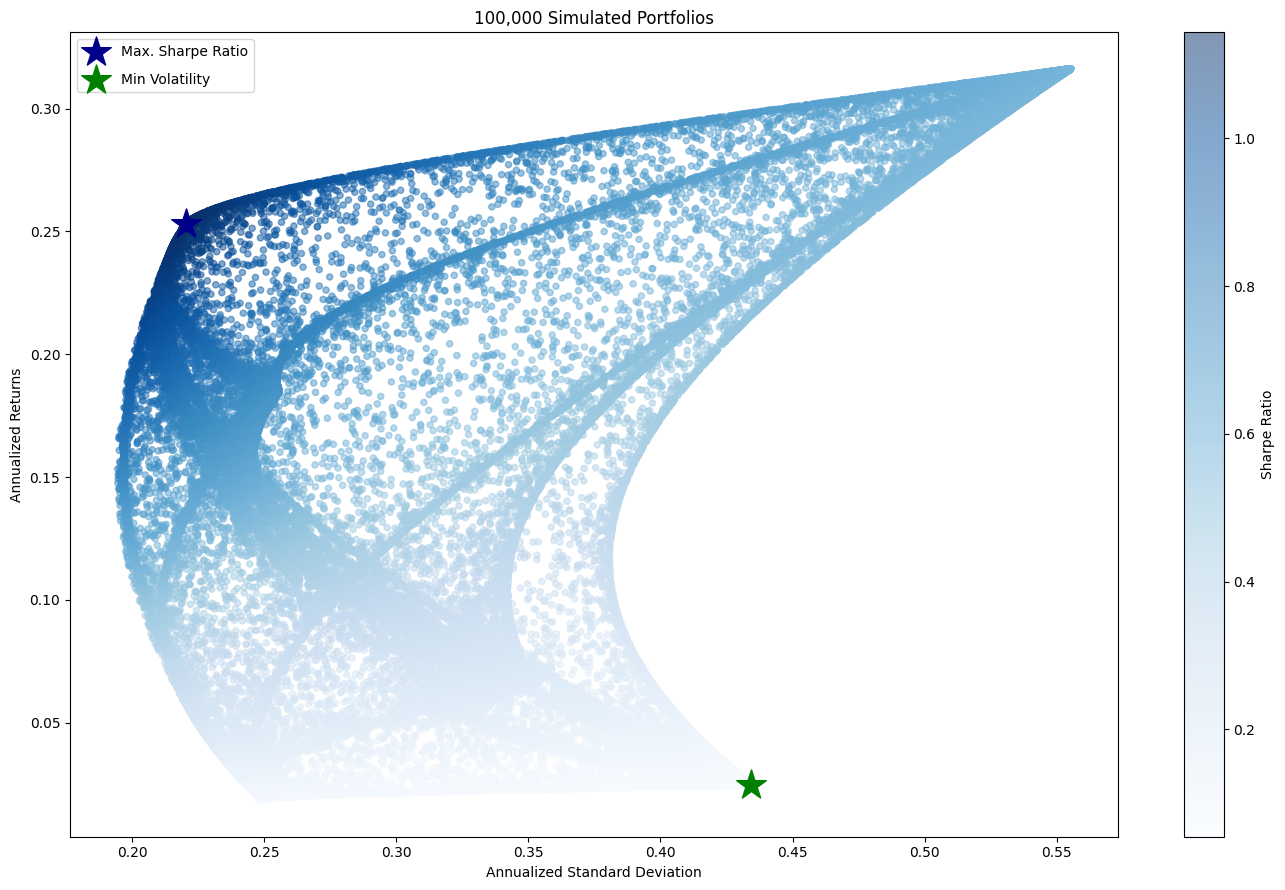

In [44]:
import warnings
warnings.filterwarnings('ignore')
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

#max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
max_sharpe_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

#min_vol_idx = simul_perf.iloc[:, 0].idxmin()
min_vol_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].min())[0][0]
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

# Compute Annualize PF Performance



Now we'll set up the quadratic optimization problem to solve for the minimum standard deviation for a given return or the maximum SR.

To this end, define the functions that measure the key metrics:

In [45]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [46]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [47]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

# Max Sharpe PF

Define a target function that represents the negative SR for scipy's minimize function to optimize, given the constraints that the weights are bounded by [-1, 1], if short trading is permitted, and [0, 1] otherwise, and sum to one in absolute terms.

In [48]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate) / sd

In [49]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [50]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':1e4})

# Compute Efficient Frontier

In [51]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 1e4})

# Min Volatility Portfolio

In [52]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 1e4})

In [53]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]

## Run Calculation

## Get random PF

In [54]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)


In [55]:
print(simul_perf.describe())


       Annualized Standard Deviation  Annualized Returns   Sharpe Ratio
count                  100000.000000       100000.000000  100000.000000
mean                        0.324317            0.141503       0.468571
std                         0.104652            0.100333       0.352167
min                         0.194568            0.018480       0.054748
25%                         0.246163            0.044277       0.143335
50%                         0.280657            0.132078       0.474924
75%                         0.397792            0.236527       0.719112
max                         0.555160            0.316165       1.143725


In [56]:
simul_max_sharpe = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.220325
Annualized Returns               0.252889
Sharpe Ratio                     1.143725
Name: 95816, dtype: float64

# Get Max Sharpe PF

In [57]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

SystemError: <built-in function slsqp> returned a result with an exception set

In [ ]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate)/sd})

ret    0.234045
sd     0.224515
sr     1.038447
dtype: float64

# Get Min Vol PF

In [ ]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [ ]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 50)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))

# Plot Result

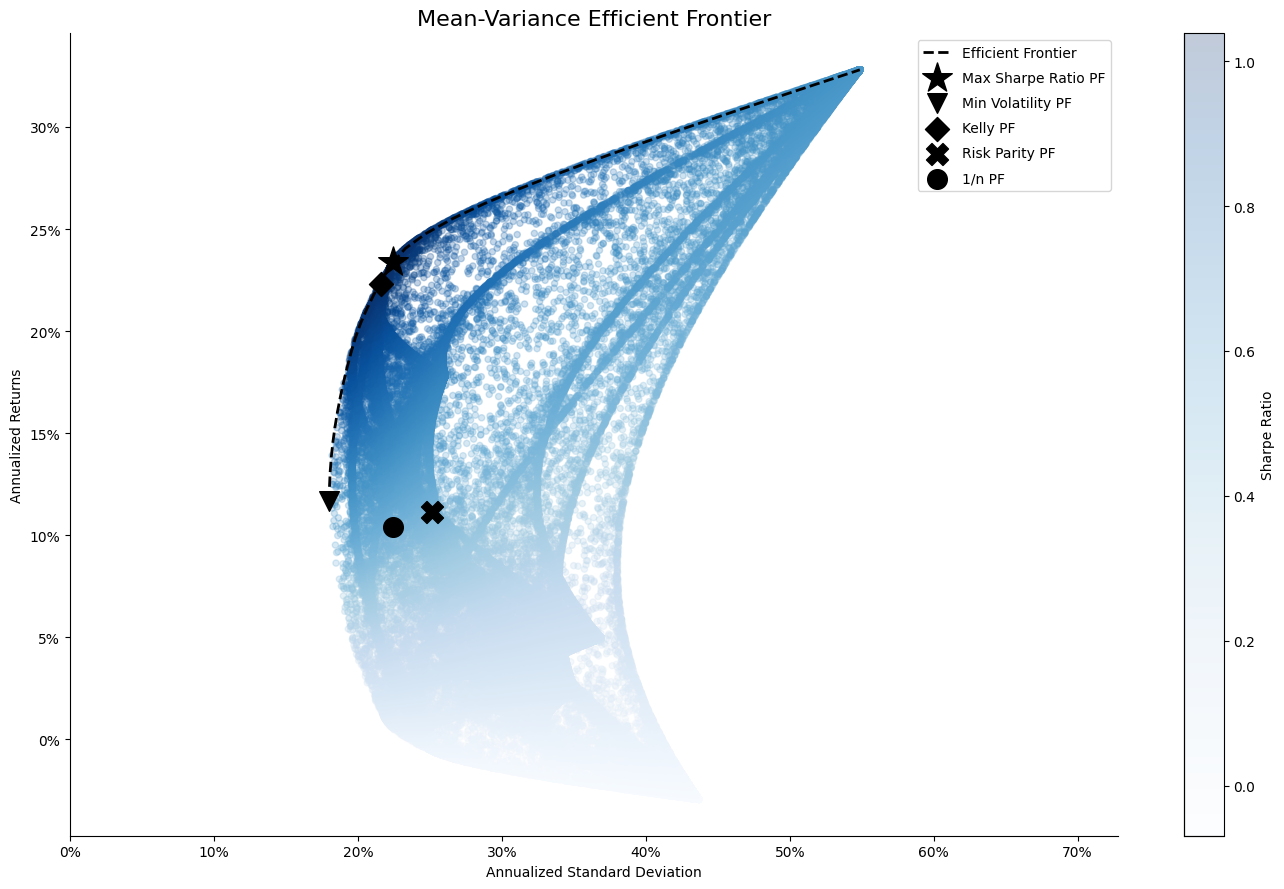

In [ ]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='Blues',alpha=0.25, 
                        figsize=(14, 9), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='k', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='k', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')

std = weekly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='X', color='k', s=250, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0, eff_pf.max()+.4)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

In [ ]:
kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [ ]:
kelly_wt

array([0.04674802, 0.08696127, 0.05989437, 0.80639633, 0.        ,
       0.        , 0.        ])

In [ ]:
['GOLD.N', 'TSLA.O', 'GOOGL.O', 'MSFT.O', 'PPG.N', 'CX.N', 'GM.N']

In [ ]:
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)


In [ ]:
print(r, sd)

0.22289245604193342 0.21571253674687976


In [ ]:
max_sharpe_pf['x']


array([2.15973073e-16, 7.98135056e-02, 0.00000000e+00, 9.20186494e-01,
       2.69966341e-16, 3.09431300e-16, 0.00000000e+00])

In [ ]:
max_sharpe_pf


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0384467525962777
       x: [ 2.160e-16  7.981e-02  0.000e+00  9.202e-01  2.700e-16
            3.094e-16  0.000e+00]
     nit: 6
     jac: [-7.982e-02 -1.160e-01 -7.809e-02 -1.148e-01  5.191e-01
            7.840e-01  5.209e-01]
    nfev: 48
    njev: 6